# **Spaceship Titanic**
## A Data Science project that predict which passengers are transported to an alternate dimension.

## **Problem overview**

- The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

- While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

- My task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly, using a set of personal records recovered from the ship's damaged computer system.

## **File and Data Field Descriptions**
### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data.
My task is to predict the value of Transported for the passengers in this set.

In [64]:
# Import required libraries for this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## Exploratory Data Analysis (EDA) process

### Importing data
This dataset is collected from Kaggle through this link: https://www.kaggle.com/competitions/spaceship-titanic/overview

In [65]:
# Load the dataset into python.

training_dataset = pd.read_csv('spaceship-titanic/train.csv')
output_dataset = pd.read_csv('spaceship-titanic/test.csv')
training_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [66]:
training_dataset.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [67]:
# Return the shape of the dataset
print(training_dataset.shape)

# Return the columns of the dataset
print(training_dataset.columns)

(8693, 14)
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


#### This dataset includes 8639 rows & 14 columns, which are stated before on the Data Field Section.

In [68]:
# Return the unique values of each category
print("The unique values of each category")
print(training_dataset.nunique().to_frame())

# Return the unique values of the HomePlanet categories, as it seems interesting
print("\nThe unique values of the HomePlanet category:")
print(training_dataset['HomePlanet'].unique())

The unique values of each category
                 0
PassengerId   8693
HomePlanet       3
CryoSleep        2
Cabin         6560
Destination      3
Age             80
VIP              2
RoomService   1273
FoodCourt     1507
ShoppingMall  1115
Spa           1327
VRDeck        1306
Name          8473
Transported      2

The unique values of the HomePlanet category:
['Europa' 'Earth' 'Mars' nan]


### Data Evaluating


We can see that there are categories that might and might not be related to the final result, here is the step I'm analysing the relationships between these categories and the target variable 'Transported'.

In [69]:
# Return the percentage of Null values in every categories

print("The percentage of loss data")
print(round(training_dataset.isnull().sum().to_frame() / training_dataset.count().to_frame(), 4) * 100)

The percentage of loss data
                 0
PassengerId   0.00
HomePlanet    2.37
CryoSleep     2.56
Cabin         2.34
Destination   2.14
Age           2.10
VIP           2.39
RoomService   2.13
FoodCourt     2.15
ShoppingMall  2.45
Spa           2.15
VRDeck        2.21
Name          2.35
Transported   0.00


**The data loss in this dataset is under 5%, which Schafer (1999) asserted that a missing rate of 5% or less is inconsequential.**
- Link to article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3701793/#CR50.
- Because of that, it is better to not dropping any columns from the dataset.

**However, in this dataset, there are categories that are not related to the final result**
- Non-related categories: the categories include PassengerId, Name as those categories that definitely not related to the final result.
- Might-related categories: the categories include Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck might not related to the final result.
- Highly-related categories: the categories include HomePlanet, CryoSleep, Destination, VIP are the categories that might be most-related to the final result.
**Because of that, I will drop the non-related categories & visualise the relationships between might-related & highly-related categories.**


- **Special variable: Cabin**
- As this variable contains 3 parts, deck/num/side. It might be related to the final result. I will break this category specifically into 3 categories and visualise the relationships between them and the targetted category.

In [70]:
# Have a clearer view of Transported category (target variable)

training_dataset['Transported'].value_counts(normalize=True).to_frame()

,Transported
True,0.503624
False,0.496376


#### This means 50.3 % of people in this dataset will be transported, while the rest are not
- Bellow i will perform some correlations between some categories and the target variable

### Creating a copy of the dataset to see the correlation of cabin to target variable

In [71]:
# Return the missing values from the Cabin category. Returning its index in the training_dataset
cabin_missing_val = training_dataset['Cabin'].isnull()
missing_values = list(cabin_missing_val[cabin_missing_val > 0].index)


# Create a copy of the dataset, in that removed all the cabin missing values in the training_dataset
test_data = training_dataset.drop(missing_values)
test_data['Cabin'].isnull().sum()  # Return the number of the cabin missing values in the test_data

0

In [72]:
# Extract the column Cabin as its might be helpful
test_data['deck'] = test_data['Cabin'].apply(lambda x : str(x).split('/')[0])
test_data['num'] = test_data['Cabin'].apply(lambda x : str(x).split('/')[1])
test_data['side'] = test_data['Cabin'].apply(lambda x : str(x).split('/')[2])


# Drop the Cabin category in the test_data as it isn't used
test_data.drop(['Cabin'], axis=1, inplace=True)

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [73]:
# Return the unique values of the Cabin's sub-categories
print(test_data['deck'].unique())
print(test_data['num'].unique())
print(test_data['side'].unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
['0' '1' '2' ... '1892' '1893' '1894']
['P' 'S']


### Correlations between the Cabin's sub-categories and target variable

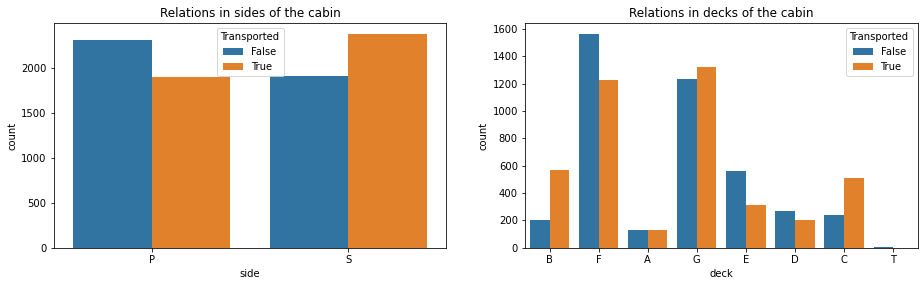

In [74]:
# Visualisation for the correlations between the sides & decks of Cabin & target variable.

fig, (ax1, ax2) = plt.subplots(1, 2) 
sns.countplot(data=test_data, x='side', hue='Transported', ax=ax1).set_title('Relations in sides of the cabin');
sns.countplot(data=test_data, x='deck', hue='Transported', ax=ax2).set_title('Relations in decks of the cabin');
plt.subplots_adjust(left=0,bottom=0.1,right=2)

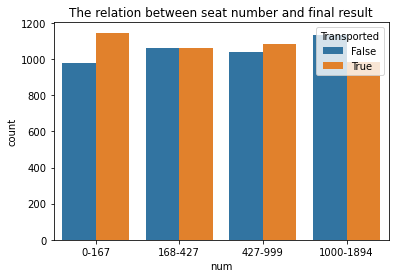

In [75]:
# Split the num category into specific groups.

seat = pd.to_numeric(test_data['num'])
seat_labels = ['0-167', '168-427', '427-999', '1000-1894']
seat_data = pd.qcut(seat, 4, labels=seat_labels)

sns.countplot(x=seat_data, hue=test_data['Transported']).set_title('The relation between seat number and final result');

#### **Observation**
**From the sides relations:**
- More people from the side S of the Cabin is being transported, while the side P is in contrast.
- Because of that, I can conclude that sides of the Cabin is **might-related** category for the dataset.
**From the decks relations:**
- It is clear that most of the people are located at the decks F & G, while there are a really few number of people located at the T deck.
- It can be seen that the correlations from deck B & C is significant, compared to another decks. However, that relations are not enough to represent the references between decks & the possibility of being transported.
- Because of that, I can conclude that decks of the Cabin is **non-related** category for the dataset.
**From the seats relations:**
- It is clear that people from the front row are having more chances to be transported, while the the lower you are, the lower chances to be transported you have.
- Because of that, I can conclude that seats of the Cabin is **non-related** category for the dataset.

##### From the above analysis, I can come up with the conclusion that most of the Cabin positions are **non-related** to the final result.
#### Besides from the fact that the sides of the seat might affect the possibilty of being transported. Because of that, it is **reasonable** to add side columns into training dataset.

In [76]:
training_dataset = pd.concat([training_dataset, test_data['side']], axis=1)
training_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,S


### Correlations between the might-related categories and target variable

#### Brief analysis of the categories

In [77]:
# Return the descriptions of each category
 
training_dataset.describe(include=[np.number])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Analysis of the relationships between age & target variable

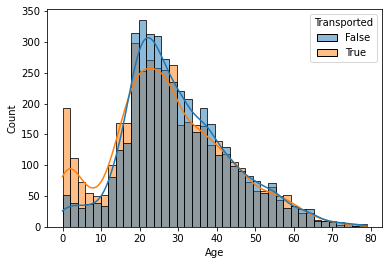

In [78]:
sns.histplot(data=training_dataset, x='Age', hue='Transported', bins=40, kde=True);

**Observation**
- Children (0-20) are more likely to be Transported.

### Analysis of the relationships between might-related categories & target variable.

- **Since there are too much differences (in quartiles) in the categories of RoomService, FoodCourt, ShoppingMall, Spa & VRDeck,**
I would like to split those categories into 2 groups, which are Purchase & Non-Purchase.

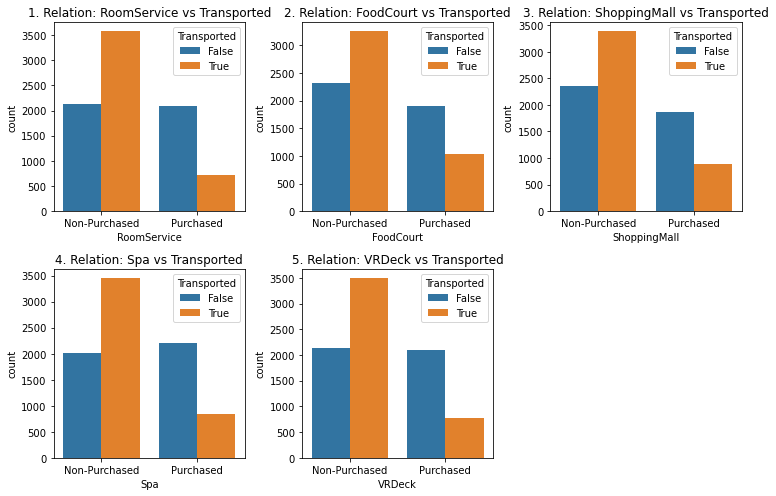

In [79]:
# Divide the might-related categories into 2 groups, which are Purchase & Non-Purchase
room = pd.cut(training_dataset['RoomService'],bins=[-1,1,max(training_dataset['RoomService']) + 1],labels=['Non-Purchased','Purchased'])
food = pd.cut(training_dataset['FoodCourt'],bins=[-1,1,max(training_dataset['FoodCourt']) + 1],labels=['Non-Purchased','Purchased'])
shopping = pd.cut(training_dataset['ShoppingMall'],bins=[-1,1,max(training_dataset['ShoppingMall']) + 1],labels=['Non-Purchased','Purchased'])
spa = pd.cut(training_dataset['Spa'],bins=[-1,1,max(training_dataset['Spa']) + 1],labels=['Non-Purchased','Purchased'])
vr = pd.cut(training_dataset['VRDeck'],bins=[-1,1,max(training_dataset['VRDeck']) + 1],labels=['Non-Purchased','Purchased'])


# Visualisations for the above categories
ncols = 3
nrows = 2
cols = [room, food, shopping, spa, vr]

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*3.5, nrows*3.5))

for r in range(nrows):
    for c in range(ncols):
        i = r * ncols + c  # loop through columns
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(x=cols[i], hue=training_dataset['Transported'], ax=ax_i);
            ax_i.set_title(f'{i + 1}. Relation: {cols[i].name} vs Transported')
            

ax.flat[-1].set_visible(False)  # Remove the last subplot            
plt.tight_layout()

**Observation**
- It is clear from most of the graph that there aren't any big relations between purchased people vs the final result, as there aren't any differences between other categories. Most of the people being transported are non-purchased.
- Because of that, I can conclude that categories of the amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities are **non-related** categories for the dataset.

### In conclusion, it is clear that non-related categories from this dataset includes 
- PassengerId
- RoomService
- FoodCourt
- ShoppingMall
- Spa
- VRDeck
- Name
- Cabin (expect for sides)

**Because of that, I'll eliminate un-used categories**

In [80]:
# Drop columns that includes non-related categories as there are no use.
training_dataset.drop(['PassengerId', 'Name', 'Cabin', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

output_dataset.drop(['Name', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1, inplace=True)

print(training_dataset.head())
print()
print(output_dataset.head())

  HomePlanet CryoSleep  Destination   Age    VIP  Transported side
0     Europa     False  TRAPPIST-1e  39.0  False        False    P
1      Earth     False  TRAPPIST-1e  24.0  False         True    S
2     Europa     False  TRAPPIST-1e  58.0   True        False    S
3     Europa     False  TRAPPIST-1e  33.0  False        False    S
4      Earth     False  TRAPPIST-1e  16.0  False         True    S

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False


**After eliminate those redundant categories, let see the remaining data loss**

Data loss per category
HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Transported      0
side           199
dtype: int64


<AxesSubplot:>

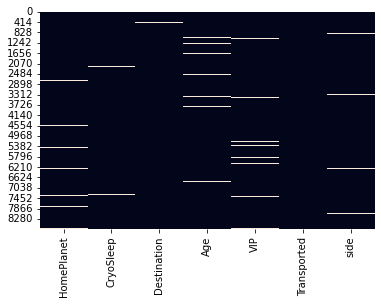

In [81]:
# Visualise the data loss in every categories

print("Data loss per category")
print(training_dataset.isnull().sum())
sns.heatmap(training_dataset.isnull(), cbar=False)

**Afterwards, I will visualise the distribution between values in the highly-related data to find out the best imputation for the data**

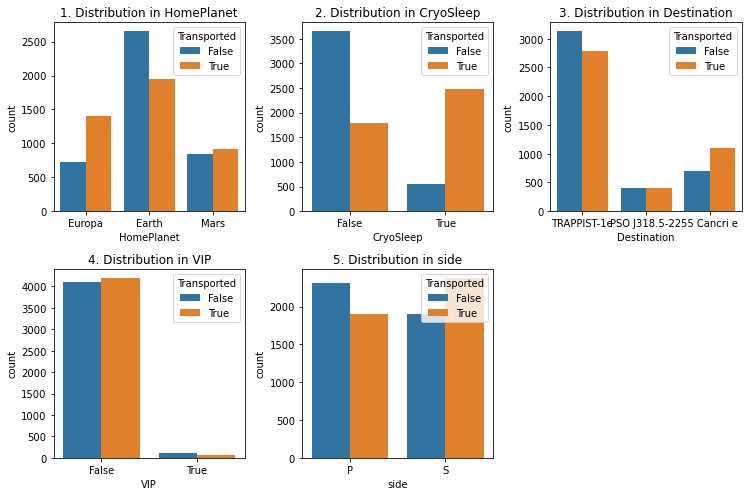

In [82]:
ncols = 3
nrows = 2
cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'side']

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*3.5, nrows*3.5))

for r in range(nrows):
    for c in range(ncols):
        i = r * ncols + c  # loop through columns
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(x=training_dataset[cols[i]], hue=training_dataset['Transported'], ax=ax_i);
            ax_i.set_title(f'{i + 1}. Distribution in {cols[i]}')
            

ax.flat[-1].set_visible(False)  # Remove the last subplot            
plt.tight_layout()

**Observation**
- It is clear now that VIP category are **non-related** category to the final result. As the differences between the VIP status & the possibility of being Transported are not efficient enough. Because of that, it is better to drop the VIP rows out of the dataset.

**Hypothesis**
- It is clear that there are significant differences in the distributions of the categories, including CryoSleep, side. Because of that, it is better to eliminate the columns without the data of those categories.
- In contrast, it can be seen that the remaining categories are not too devianted comparing with the mentioned categories, which is reasonable to replace those categories with most_frequent strategy for HomePlanet & Destination & median strategy for Age.

In [83]:
# Drop the VIP category, as mentioned above
training_dataset.drop(['VIP'], axis=1, inplace=True)

### Data Preprocessing

- Based on different ways of cleaning data (handling missing data & encode categorical datas), we can have better or worse possibility of getting a efficient ML model.
- Because of that, I will use some compare 2 strategies, that would be beneficial in making a great ML model.
1. For handling missing data, I have 2 strategies based on the hypothesis.
- Remove all the missing data.
- Replace the missing data with the most_frequent appearance or median strategy.

2. For encoding categorical datas (including 'HomePlanet', 'Destination'), I have 2 strategies as well.
- Ordinal Encoding: Encode the data into different numbers that represent the categories of the data.
- One-Hot-Encoding: Encode the data into matrices that that represent the categories of the data.

**To achieve the most convenient & efficient approach, I would build pipelines, in order to make the data-preprocessing steps easier & more concise.**

In [84]:
# Separate target from predictors
testing_dataset = training_dataset['Transported']
training_dataset.drop(['Transported'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(training_dataset, testing_dataset, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# Select categorical columns
categorical_cols = [cname for cname in X_train_full.columns if 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

# Extract the column Cabin in the output_dataset
output_dataset['side'] = output_dataset['Cabin'].apply(lambda x : x if (type(x) == type(output_dataset['Cabin'][18])) else str(x).split('/')[2])
output_dataset.drop(['Cabin'], axis=1, inplace=True)

In [85]:
output_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,S


In [86]:
# Define a same model for the dataset
model = DecisionTreeRegressor(random_state=0)

# Missing values handling for numerical data
median_imputer = SimpleImputer(strategy='median')
mean_imputer = SimpleImputer(strategy='mean')
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

#### Pipeline for encoding categorical data

In [87]:
# Processing strategies for categorical data
mfi_oe_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('odi', OrdinalEncoder())
])

mfi_oh_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### Mean Absolute Error (MAE) for Approach of: Median Imputer for numerical data & One Hot Encoder for categorical data

In [88]:
# Bundles preprocessing for numerical and categorical data
# Strategy: median imputer for numerical columns.
# Strategy: One Hot Encoder for categorical columns.

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', median_imputer, numerical_cols),
        ('cat', mfi_oh_transformer, categorical_cols)
    ])


clf1 = Pipeline(steps=[('preprocessor', preprocessor1),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf1.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf1.predict(X_valid)
print('MAE 1:', mean_absolute_error(y_valid, preds))

MAE 1: 0.3557281048978256


#### Mean Absolute Error (MAE) for Approach of: Mean Imputer for numerical data & One Hot Encoder for categorical data

In [89]:
# Bundles preprocessing for numerical and categorical data
# Strategy: mean imputer for numerical collumns.
# Strategy: One Hot Encoder for categorical columns.

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', mean_imputer, numerical_cols),
        ('cat', mfi_oh_transformer, categorical_cols)
    ])


clf2 = Pipeline(steps=[('preprocessor', preprocessor2),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf2.predict(X_valid)
print('MAE 2:', mean_absolute_error(y_valid, preds))

MAE 2: 0.3551242877450443


#### Mean Absolute Error (MAE) for Approach of: Most Frequent Imputer for numerical data & One Hot Encoder for categorical data

In [90]:
# Bundles preprocessing for numerical and categorical data
# Strategy: most_frequent imputer for numerical collumns.
# Strategy: One Hot Encoder for categorical columns.

preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', most_frequent_imputer, numerical_cols),
        ('cat', mfi_oh_transformer, categorical_cols)
    ])


clf3 = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf3.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf3.predict(X_valid)
print('MAE 3:', mean_absolute_error(y_valid, preds))

MAE 3: 0.35621941990291145


#### Mean Absolute Error (MAE) for Approach of: Most Median Imputer for numerical data & Ordinal Encoder for categorical data

In [91]:
# Bundles preprocessing for numerical and categorical data
# Strategy: median imputer for numerical collumns.
# Strategy: Ordinal Encoder for categorical columns.

preprocessor4 = ColumnTransformer(
    transformers=[
        ('num', median_imputer, numerical_cols),
        ('cat', mfi_oe_transformer, categorical_cols)
    ])


clf4 = Pipeline(steps=[('preprocessor', preprocessor4),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf4.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf4.predict(X_valid)
print('MAE 4:', mean_absolute_error(y_valid, preds))

MAE 4: 0.3556790261253426


#### Mean Absolute Error (MAE) for Approach of: Mean Imputer for numerical data & Ordinal Encoder for categorical data

In [92]:
# Bundles preprocessing for numerical and categorical data
# Strategy: mean imputer for numerical collumns.
# Strategy: Ordinal Encoder for categorical columns.

preprocessor5 = ColumnTransformer(
    transformers=[
        ('num', mean_imputer, numerical_cols),
        ('cat', mfi_oe_transformer, categorical_cols)
    ])


clf5 = Pipeline(steps=[('preprocessor', preprocessor5),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf5.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf5.predict(X_valid)
print('MAE 5:', mean_absolute_error(y_valid, preds))

MAE 5: 0.35500517166848145


#### Mean Absolute Error (MAE) for Approach of: Most Frequent Imputer for numerical data & Ordinal Encoder for categorical data

In [93]:
# Bundles preprocessing for numerical and categorical data
# Strategy: most_frequent imputer for numerical collumns.
# Strategy: Ordinal Encoder for categorical columns.

preprocessor6 = ColumnTransformer(
    transformers=[
        ('num', most_frequent_imputer, numerical_cols),
        ('cat', mfi_oe_transformer, categorical_cols)
    ])


clf6 = Pipeline(steps=[('preprocessor', preprocessor6),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf6.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf6.predict(X_valid)
print('MAE 6:', mean_absolute_error(y_valid, preds))

MAE 6: 0.35664111819695016


### Observation

- Since the lower MAE is, the better preprocessing we're having.
- The best preprocessing strategy (approach) is replacing missing data with most frequent data & encode the categorical data by the strategy Ordinal.
- The MAE for this approach is ~0.3550 (MAE 5)

In [94]:
best_preprocesser = preprocessor5

### Data Model Evaluation

- **In this step, I will evaluate the effiency of the models, specifically DecisionTreeRegressor & RandomForestRegressor**
- Afterwards, I will look fot the best number of nodes to achieve the best model & avoiding underfitting & overfitting.

#### This is the evaluation for the DecisionTreeRegressor model.
- I'm using the parameter random_state as to avoid bias dataset.

In [95]:
# Specify Model (DecisionTreeRegressor)
decision_tree = DecisionTreeRegressor(random_state=1)

eval_decision_tree = Pipeline(steps=[('preprocessor', best_preprocesser),
                     ('model', decision_tree)
                     ])

# Preprocessing of training data, fit model 
eval_decision_tree.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = eval_decision_tree.predict(X_valid)
print("Validation MAE of the model DecisionTreeRegressor:", mean_absolute_error(preds, y_valid))

Validation MAE of the model DecisionTreeRegressor: 0.3544301285402468


#### This is the evaluation for the RandomForestRegressor model.

In [96]:
# Specify Model (RandomForestRegressor)
random_forest = RandomForestRegressor(random_state=1)

eval_random_forest = Pipeline(steps=[('preprocessor', best_preprocesser),
                     ('model', random_forest)
                     ])

# Preprocessing of training data, fit model 
eval_random_forest.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = eval_random_forest.predict(X_valid)
print("Validation MAE of the model RandomForestRegressor:", mean_absolute_error(preds, y_valid))

Validation MAE of the model RandomForestRegressor: 0.35594970148650523


**Observation**
- It is clear that the model DecisionTreeRegresson performs better (0.3544 vs 0.3559)
- Because of that, it is clear that the DecisionTreeRegressor works better in this situation.

### Optimise the model for better predictions.

- Since the model works differently with different number of nodes, it is better to optimize the size of the tree to make better predictions.

**We will try adjusting the following set of hyperparameters:**

- max_depth = The maximum depth of the tree
- max_features = max number of features considered for splitting a node
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

#### Evaluate the range of values of the herparameters

In [97]:
max_depth = np.arange(1, 100, 10, dtype=int)
max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

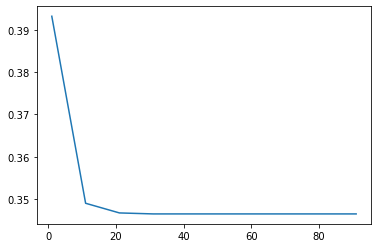

In [98]:
max_depth_results = {values : sum(-1 * cross_val_score(Pipeline(steps=[
                                        ('preprocessor', best_preprocesser),
                                        ('model', DecisionTreeRegressor(max_depth=values, random_state=0))
                                        ]), X_train, y_train, cv=5, scoring='neg_mean_absolute_error')) / 5
                     for values in max_depth}

plt.plot(list(max_depth_results.keys()), list(max_depth_results.values()))
plt.show()

In [99]:
max_depth_best = min(max_depth_results, key=max_depth_results.get)
print(max_depth_best)

31


**Observation**
- It is clear that the best value for the parameter max_depth is around 20 (30, for more accurate).

In [100]:
max_features_results = {values : sum(-1 * cross_val_score(Pipeline(steps=[
                                        ('preprocessor', best_preprocesser),
                                        ('model', DecisionTreeRegressor(max_features=values, random_state=0))
                                        ]), X_train, y_train, cv=5, scoring='neg_mean_absolute_error')) / 5
                     for values in max_features}

max_features_best = min(max_features_results, key=max_features_results.get)
print(max_features_best)

auto


In [101]:
min_samples_leaf_results = {values : sum(-1 * cross_val_score(Pipeline(steps=[
                                        ('preprocessor', best_preprocesser),
                                        ('model', DecisionTreeRegressor(min_samples_leaf=values, random_state=0))
                                        ]), X_train, y_train, cv=5, scoring='neg_mean_absolute_error')) / 5
                     for values in min_samples_leaf}

min_samples_leaf_best = min(min_samples_leaf_results, key=min_samples_leaf_results.get)
print(min_samples_leaf_best)

2


In [102]:
min_samples_split_results = {values : sum(-1 * cross_val_score(Pipeline(steps=[
                                        ('preprocessor', best_preprocesser),
                                        ('model', DecisionTreeRegressor(min_samples_split=values, random_state=0))
                                        ]), X_train, y_train, cv=5, scoring='neg_mean_absolute_error')) / 5
                     for values in min_samples_split}

min_samples_split_best = min(min_samples_split_results, key=min_samples_split_results.get)
print(min_samples_split_best)

10


#### Comparing the model just evaluated & the previous one

In [103]:
best_model = DecisionTreeRegressor(random_state=1, max_depth=31, max_features='auto', 
                                   min_samples_leaf=2, min_samples_split=10)

eval_decision_tree = Pipeline(steps=[('preprocessor', best_preprocesser),
                     ('model', best_model)
                     ])

# Preprocessing of training data, fit model 
eval_decision_tree.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = eval_decision_tree.predict(X_valid)
print("Validation MAE of the best model DecisionTreeRegressor:", mean_absolute_error(preds, y_valid))

Validation MAE of the best model DecisionTreeRegressor: 0.3566066876942778


### Conclusion

- Since the hypothesis of Cross-Validation doesn't work better than the normal DecisionTreeRegressor().
- The best model for this situation is DecisionTreeRegressor().

In [104]:
# Best pipeline for the dataset.
df_pipeline = Pipeline(steps=[('preprocessor', best_preprocesser),
                     ('model', DecisionTreeRegressor())
                     ])

### Extract the result into a file to evaluate.
- Below I will extract the file of submission to submit to the challenge of Kaggle.

In [105]:
# make predictions which we will submit.
output_dataset.head()
df_pipeline.fit(X_train, y_train)
test_preds = df_pipeline.predict(output_dataset)

In [129]:
output = pd.DataFrame({'PassengerId': output_dataset["PassengerId"],
                       'Transported': (float(value) > 0.503624 for value in test_preds)})

output.to_csv('submission.csv', index=False)